<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter02/Building_a_neural_network_using_PyTorch_on_a_toy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torch.nn as nn
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [6]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

X.shape, Y.shape

(torch.Size([4, 2]), torch.Size([4, 1]))

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [8]:
#Rewrite for conventions --> define the architecture as a function; forward propagation is simply then the f(x)
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__() #Initialize all the parameters; Inherit from the nn.Module
        
        self.model = nn.Sequential(
            nn.Linear(2,8),
            nn.ReLU(), #Activation function
            nn.Linear(8,1)
        )
    
    def forward(self, x):
        return self.model(x)

In [11]:
mynet = MyNeuralNet().to(device)
mynet.model(X)[0] #There is a whole goofy ahh notebook dedicated to this simple idea
mynet.model[0].weight #Done for weights too


#In the book, this is defined as a variable "mynet.input_to_hidden_layer.weight"


tensor([-0.3597], grad_fn=<SelectBackward0>)

In [28]:
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[ 0.0811, -0.1144],
        [ 0.4620,  0.6663],
        [ 0.6421,  0.0981],
        [ 0.5298,  0.0923],
        [-0.5770, -0.3923],
        [-0.3848, -0.1091],
        [-0.4163,  0.4679],
        [-0.6729, -0.5193]], requires_grad=True)
Parameter containing:
tensor([-0.2038,  0.2110,  0.6489, -0.3546, -0.1761, -0.0861,  0.1621, -0.5057],
       requires_grad=True)
Parameter containing:
tensor([[ 0.1154, -0.0202, -0.1207, -0.1712,  0.1429,  0.0935, -0.2156, -0.2743]],
       requires_grad=True)
Parameter containing:
tensor([0.1009], requires_grad=True)


In [20]:
loss_func = nn.MSELoss()

In [21]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y) #loss function --> (predicted, ground_truth)
print(loss_value)

tensor(116.5223, grad_fn=<MseLossBackward0>)


In [41]:
from torch.optim import SGD #Stochastic Gradient Descent
opt = SGD(mynet.parameters(), lr = 0.01)

In [44]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

Text(0, 0.5, 'loss value')

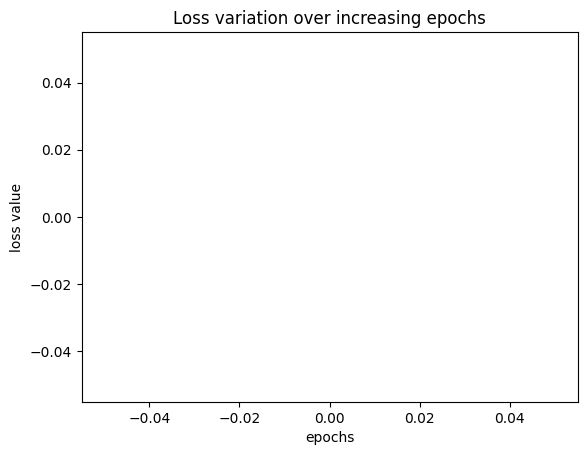

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')